# Simuler la chute du sable avec des règles simples

________________________________________

L'objectif du TP est de simuler la chute du sable, le résultat final sera le suivant (exécuter le script suivant)

In [ ]:
# EXECUTER CETTE CELLULE
import numpy as np
import warnings
import random
from _validation import *
import _validation as _vd

var_test_import = 1
test_imports()

frames = 75
n = 25
i = 0
stop = 0
toutesLesFrames,n = calculToutesFrames(frames, n,n, _vd._sable_regle_1_2_b, "grande")

def setup():
    createCanvas(500, 500)
    

def draw():
    global i,frames,toutesLesFrames,n,stop
    step(toutesLesFrames,i,n)
    i = (i+1) % frames
    stop += 1
    if stop > 200:
        exit()
    
run()

Nous allons simuler la chute du sable à l'aide de Python. Pour cela, nous allons considérer un cadrillage où chaque carré est soit un bloc (mur), soit de l'air, soit du sable.

Si l'on a des coordonnées $(x , \; y )$ , on peut connaitre les coordonnées des cases voisines comme sur la figure ci-dessous.

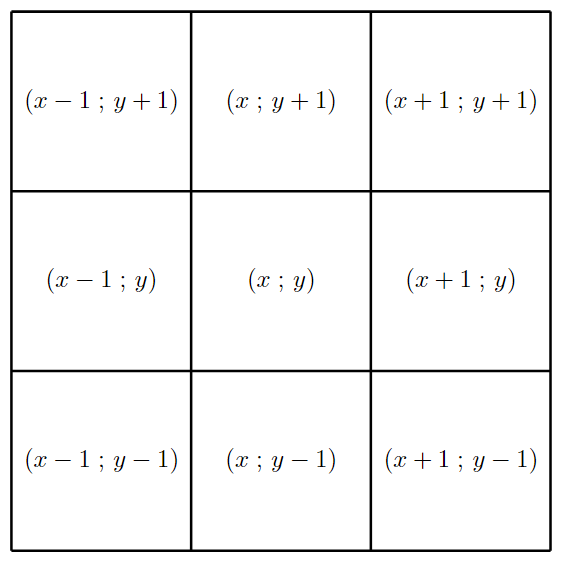

#### Question 1 

Remplir les valeurs des variables dans la figure ci-dessous.
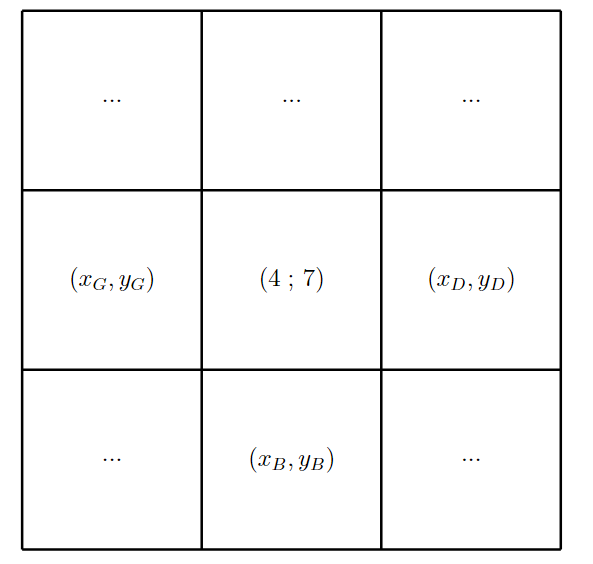

In [ ]:

xD = 
yD =

xG = 
yG = 

xB = 
yB = 

In [ ]:
test_question_1()

________________________________________

## Règle 1 : le sable tombe vers le bas s'il y a de l'air en-dessous.

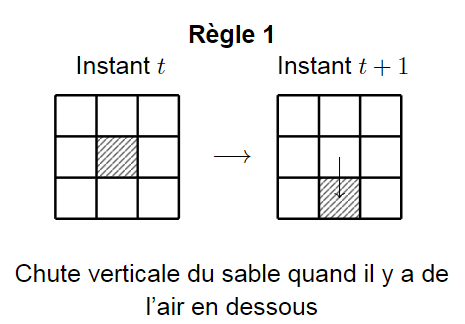

Le cadrillage est composé de cases dont les coordonnées ont été définies plus haut. 

Chaque case contient une quantité indiquant s'il s'agit d'une case d'air / d'un bloc / de sable. Pour simplifier la lecture des scripts, on donne les noms suivants aux quantités qui nous intéressent :
- AIR est la quantité que contiennent les cases d'air
- BLOC est la quantité que contiennent les cases bloc
- SABLE est la quantité que contiennent les cases sable

Le script ci-dessous explicite ces quantités :

In [ ]:
AIR = 0
SABLE = 1
BLOC = 2

# Pour plus de lisibilité, on préfèrera écrire AIR (en majuscules!!!!!) plutot que 0.

Dans toutes les fonctions codées, les arguments suivants seront donnés :
- "x" l'abscisse de la case observée
- "y" l'ordonnée de la case observée
- "G" contenant la quantité de la case à gauche de celle de coordonnées $(x, \;y)$
- "BG" contenant la quantité de la case en bas à gauche de celle de coordonnées $(x, \;y)$
- "BD" contenant la quantité de la case en bas à droite de celle de coordonnées $(x, \;y)$
- "D" contenant la quantité de la case à droite de celle de coordonnées $(x, \;y)$


#### Question 2

Compléter le script suivant pour qu'il renvoit la nouvelle position du sable. On ne cherche qu'à appliquer la règle 1 illustrée plus haut.

In [ ]:
def sable_regle_1(x,y,G,BG,B,BD,D):
    if ... :                            # Règle 1
        return ... , ...    
    else :                              # Si la règle 1 ne s'applique pas
        return ... , ...

In [ ]:
test_question_2()

In [ ]:
frames = 75
n = 10
i = 0
stop = 0
toutesLesFrames,n = calculToutesFrames(frames, n,n, _vd._sable_regle_1, "grande")

simu_1 = 1
test_simu_1()

def setup():
    createCanvas(500, 500)
    

def draw():
    global i,frames,toutesLesFrames,n,stop
    step(toutesLesFrames,i,n)
    i = (i+1) % frames
    stop += 1
    if stop > 200:
        exit()
run()

__________________________________

## Règle 2 : Si le sable ne peut pas tomber vers le bas, il tombe en diagonale (d'abord à gauche s'il le peut)

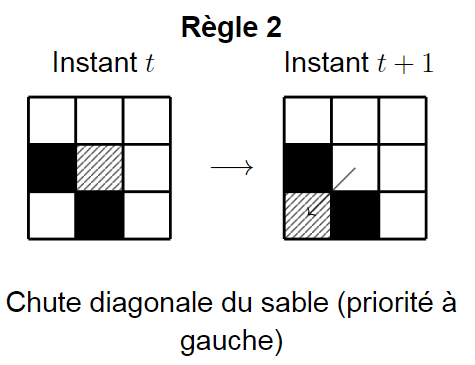

## Question 3

La fonction précédente laisse à désirer, le sable roule sur les pentes, ce qui n'est pas le cas ici. On souhaite donc refaire une fonction qui permette de modéliser un peu mieux la chute du sable.

Compléter la fonction suivante pour qu'elle applique la règle 1 ainsi que la règle 2. 

In [ ]:
def sable_regle_1_et_2(x,y,G,BG,B,BD,D):
    if  ... :                           # Règle 1 : si le sable peut tomber verticalement, il le fait
        return ... , ...
    elif ... :                          # Règle 2 : cas où le sable peut tomber en bas à gauche
        return ... , ...
    elif ... , ... :                    # Règle 2 : cas où le sable peut tomber en bas à droite
        return ... , ...
    else :                              # Dans tous les autres cas
        return ... , ...

In [ ]:
test_question_3()

In [ ]:
frames = 75
n = 10
i = 0
stop = 0
toutesLesFrames,n = calculToutesFrames(frames, n,n, _vd._sable_regle_1_2_a, 3)

simu_2 = 1
test_simu_2()

def setup():
    createCanvas(500, 500)
    

def draw():
    global i,frames,toutesLesFrames,n,stop
    step(toutesLesFrames,i//10,n)
    i = (i+1) % (10*frames)
    stop += 1
    if stop > 200:
        exit()
    
run()

______________________________________

## Question 4

On se propose d'effectuer un changement sur la règle 2. Le sable ne privilégie pas particulièrement le côté gauche. Pour améliorer la simulation, nous allons refaire une fonction qui choisit au hasard entre la gauche et la droite.

Compléter la fonction suivante pour qu'elle applique la règle 1 ainsi que la règle 2 où l'on choisit au hasard entre la gauche et la droite. 

In [ ]:
def sable_regle_1_2_hasard(x,y,G,BG,B,BD,D):
    if ... :                            # Règle 1 : si le sable peut tomber verticalement, il le fait
        return ... , ...
    elif ... :                          # Règle 2 : cas où le sable ne peut tomber QUE en bas à gauche
        return ... , ...
    elif ... :                          # Règle 2 : cas où le sable ne peut tomber QUE en bas à droite
        return ... , ...
    elif ... :                          # Règle 2 : cas où le sable peut tomber à gauche ou à droite (au hasard)
        hasard = random.randint(0,1)    # tire un nombre au hasard parmis 0 et 1
        return ... , ...
    else :                              # Dans tous les autres cas
        return ... , ...

In [ ]:
def q4_seed(x,y,G,BG,B,BD,D,seed):
    random.seed(seed)
    return sable_regle_1_2_hasard(x,y,G,BG,B,BD,D)
test_question_4()

In [ ]:
frames = 75
n = 10
i = 0
stop = 0
toutesLesFrames,n = calculToutesFrames(frames, n,n, _vd._sable_regle_1_2_a_hasard, "grande")

simu_3 = 1
test_simu_3()

def setup():
    createCanvas(500, 500)
    

def draw():
    global i,frames,toutesLesFrames,n,stop
    step(toutesLesFrames,i,n)
    i = (i+1) % frames
    stop += 1
    if stop > 200:
        exit()
run()

## Est-ce que le sable se faufille vraiment entre les blocs?

On a fait le choix de dire que le sable se faufile entre les blocs. Mais que se passe-t-il si l'on empèche le sable de se faufiler tout en pouvant chuter en diagonale.

On a ci-dessous un exemple où le sable n'aurait pas le droit de se faufiler.

## Question 5

On se propose d'effectuer un changement sur la règle 2. Le sable ne privilégie pas particulièrement le côté gauche. Pour améliorer la simulation, nous allons refaire une fonction qui choisit au hasard entre la gauche et la droite.

Compléter la fonction suivante pour qu'elle applique la règle 1 ainsi que la règle 2 où l'on choisit au hasard entre la gauche et la droite. 

#### Question 5.a)

Supposons que nous sommes dans le cas :
- x = 3
- y = 4
- G = BLOC
- BG = AIR
- B = BLOC 
- BD = BLOC
- D = BLOC

Sur un brouillon ou une ardoise, représenter la situation comme fait plus haut (air = blanc, sable = hachuré , bloc = noir). Ensuire, remplir la nouvelle valeur de $x$ et de $y$ après l'application des règles modifiées pour que le sable ne se faufile pas.

In [ ]:
x = ...
y = ...

In [ ]:
test_question_5_a()

## Question 5.b)

Ecrivez la condition faisant intervenir les données  G , BG, B, BD, D permettant de vérifier si le sable peut tomber dans la case en bas à gauche. Vous vérifierez vos conditions sur les exemples suivants :


| variable| |Exemple 1| Exemple 2| Exemple 3|
|------|-|----------------------|----------------------|----------------------|
|x||3|5 |2 |
|y||4|9 |3 |
|G||BLOC|AIR |AIR |
|BG||AIR|AIR |AIR |
|B||BLOC |BLOC |BLOC |
|BD||BLOC|AIR |AIR |
|D||BLOC|BLOC |BLOC |


In [ ]:
condition_pour_en_bas_a_gauche = ...

<br>

<br>

<br>

<br>

<br>

<br>


### Demander la validation du professeur avant de passer à la suite

<br>

<br>

<br>

<br>


<br>

<br>


## Question 5.c)

Compléter le script pour créer les règles modifiées où le sable ne se faufile pas.

In [ ]:
def sable_regle_1_2_hasard_modifiee(x,y,G,BG,B,BD,D):
    if ... :                            # Règle 1 : si le sable peut tomber verticalement, il le fait
        return ... , ...
    elif ... :                          # Règle 2 : cas où le sable ne peut tomber QUE en bas à gauche
        return ... , ...
    elif ... :                          # Règle 2 : cas où le sable ne peut tomber QUE en bas à droite
        return ... , ...
    elif ... :                          # Règle 2 : cas où le sable peut tomber à gauche ou à droite (au hasard)
        hasard = random.randint(0,1)    # tire un nombre au hasard parmis 0 et 1
        return ... , ...
    else :                              # Dans tous les autres cas
        return ... , ...

In [ ]:
def q5_seed(x,y,G,BG,B,BD,D,seed):
    random.seed(seed)
    return sable_regle_1_2_hasard_modifiee(x,y,G,BG,B,BD,D)
test_question_5_c()

In [ ]:
frames = 75
n = 10
i = 0
stop = 0
toutesLesFrames,n = calculToutesFrames(frames, n,n, _vd._sable_regle_1_2_b, "grande")

simu_4 = 1
test_simu_4()

def setup():
    createCanvas(500, 500)
    

def draw():
    global i,frames,toutesLesFrames,n,stop
    step(toutesLesFrames,i,n)
    i = (i+1) % frames
    stop += 1
    if stop > 200:
        exit()
run()

# Bravo, tu as fini le TP! 